In [ ]:
# ipython
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
import glob
import json
import os
import sys
import json
import os
import sys
import multiprocessing


In [18]:
report_file = "all_reports.csv"

def read_report(x):
    with open(x) as xfp:
        j = json.load(xfp)["frames"][0]["metrics"]
    r = {
        "image": os.path.splitext(os.path.basename(x))[0].replace("encoded_", ""),
        "src": os.path.basename(os.path.dirname(x))
    }
    for k in ["adm2", "ms_ssim", "psnr", "ssim", "vif_scale0", "vif_scale1", "vif_scale2", "vif_scale3", "vmaf"]:
        r[k] = j[k]
    return r


if not os.path.isfile(report_file):
    reports = list(glob.glob("reports/*/*.json"))
    pool = multiprocessing.Pool(multiprocessing.cpu_count())
    res = pool.map(read_report, reports)
    #res = list(map(read_report, reports[0:10]))
    dr = pd.DataFrame(res)
    dr.to_csv(report_file, index=False)

dr = pd.read_csv(report_file)
d(dr.head())


,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717


In [19]:
dr["vmaf_round"] = dr["vmaf"].round(0)
d(dr.head())

,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf,vmaf_round
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443,93.0
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009,93.0
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534,67.0
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813,67.0
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717,12.0


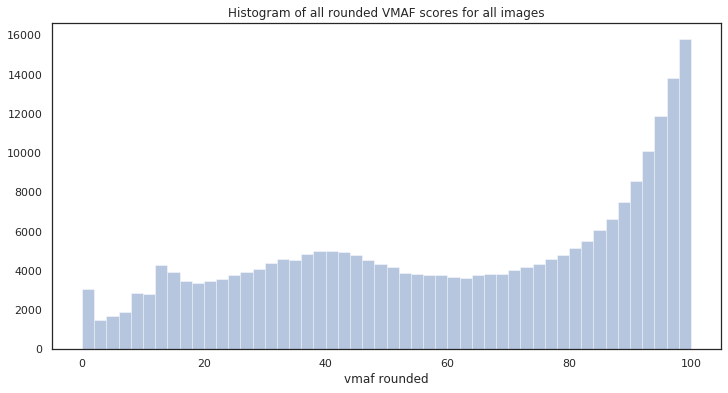

In [29]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("white")

ax = sns.distplot(dr["vmaf_round"], kde=False, hist=True)
ax.set_title("Histogram of all rounded VMAF scores for all images")
ax.set_xlabel("vmaf rounded")
ax.get_figure().savefig("all_img_vmaf_distplot.pdf", bbox_inches="tight")

In [35]:
def get_crf(x):
    t = x.split("_")
    for i, x in enumerate(t):
        if x == "crf":
            return int(t[i + 1])

def get_height(x):
    t = x.split("_")
    for i, x in enumerate(t):
        if x == "height":
            return int(t[i + 1])
    
dr["crf"] = dr["image"].apply(get_crf)
dr["height"] = dr["image"].apply(get_height)
d(dr)

,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf,vmaf_round,crf,height
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443,93.0,14,1360
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009,93.0,20,2128
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534,67.0,29,1264
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813,67.0,31,1520
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717,12.0,41,528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246120,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.97021,0.99483,40.84433,0.99967,0.60658,0.98196,0.99226,0.99568,94.38248,94.0,9,1552
246121,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.85653,0.93881,32.93977,0.98645,0.23650,0.62772,0.77579,0.86234,67.94294,68.0,27,1600
246122,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.86605,0.94419,33.27676,0.98828,0.25037,0.65508,0.79800,0.87910,70.13653,70.0,28,1920
246123,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.49244,0.68165,26.04406,0.74575,0.04025,0.13790,0.19262,0.24435,22.17270,22.0,44,976


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


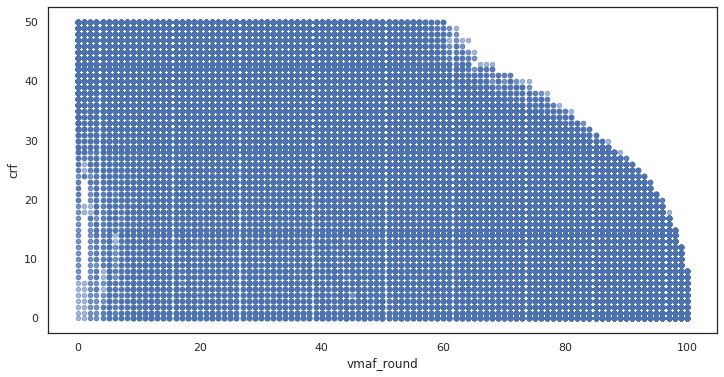

In [37]:
dr.plot(x="vmaf_round", y="crf", kind="scatter", alpha=0.5)

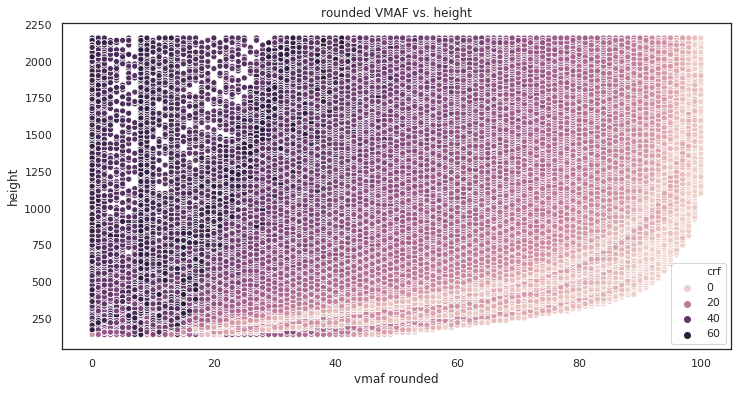

In [51]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("white")

ax = sns.scatterplot(
    x="vmaf_round", 
    y="height",
    hue="crf", 
    data=dr
)
ax.set_title("rounded VMAF vs. height")
ax.get_figure().savefig("all_img_vmaf_vs_height.pdf", bbox_inches="tight", dpi=400, rasterized=True)

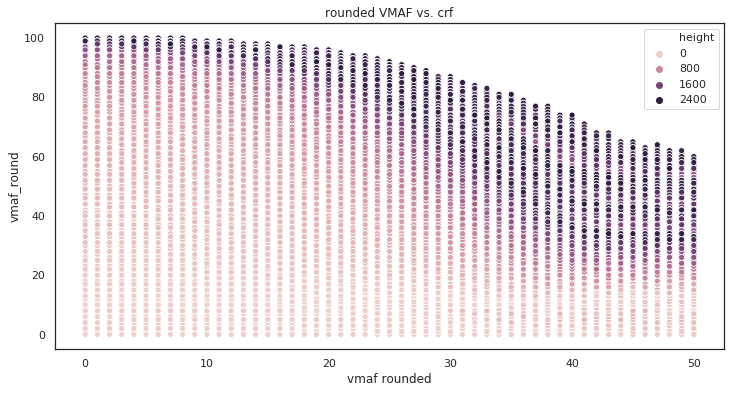

In [89]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("white")

ax = sns.scatterplot(
    y="vmaf_round", 
    x="crf",
    hue="height", 
    data=dr
)
ax.set_title("rounded VMAF vs. crf")
ax.get_figure().savefig("all_img_vmaf_vs_crf.pdf", bbox_inches="tight", dpi=400, rasterized=True)

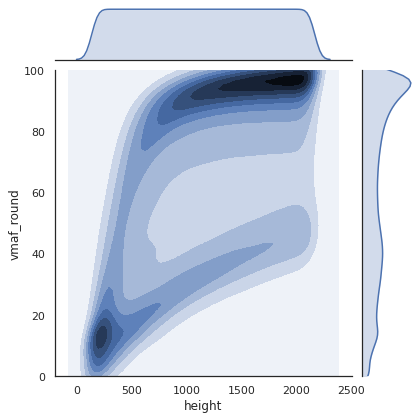

In [113]:
dr["height_log2"] = np.log2(dr["height"])
ax = sns.jointplot(
    y="vmaf_round", 
    x="height", 
    kind="kde",
    data=dr,
    ylim=(0,100)
)

ax.savefig("all_img_kde_vmaf_vs_height.pdf", bbox_inches="tight", dpi=400, rasterized=True)

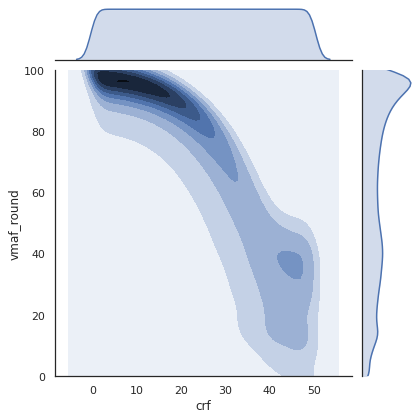

In [111]:
dr["crf_log2"] = np.log2(dr["crf"] + 1)
ax = sns.jointplot(
    y="vmaf_round", 
    x="crf", 
    kind="kde",
    data=dr,
    ylim=(0,100)
)
ax.savefig("all_img_kde_vmaf_vs_crf.pdf", bbox_inches="tight", dpi=400, rasterized=True)

In [114]:
df = pd.read_csv("filesize.csv.gz", header=None, names=["size", "file"], sep="\t")

df["image"] = df["file"].apply(lambda x: os.path.splitext(x)[0].replace("/", "_").replace("encoded_", ""))
d(df)
dk = pd.merge(dr, df, left_on="image", right_on="image")
d(dk.head())
print(len(dk), len(df), len(dr))

,size,file,image
0,11575,encoded/air_acrobatics_harmonic/air_acrobatics...,air_acrobatics_harmonic_air_acrobatics_harmoni...
1,13207,encoded/air_acrobatics_harmonic/air_acrobatics...,air_acrobatics_harmonic_air_acrobatics_harmoni...
2,15271,encoded/air_acrobatics_harmonic/air_acrobatics...,air_acrobatics_harmonic_air_acrobatics_harmoni...
3,16999,encoded/air_acrobatics_harmonic/air_acrobatics...,air_acrobatics_harmonic_air_acrobatics_harmoni...
4,19882,encoded/air_acrobatics_harmonic/air_acrobatics...,air_acrobatics_harmonic_air_acrobatics_harmoni...
...,...,...,...
246121,4644,encoded/weapon8k-standard-60fps-12to1redcode_1...,weapon8k-standard-60fps-12to1redcode_16x9_444_...
246122,4679,encoded/weapon8k-standard-60fps-12to1redcode_1...,weapon8k-standard-60fps-12to1redcode_16x9_444_...
246123,4785,encoded/weapon8k-standard-60fps-12to1redcode_1...,weapon8k-standard-60fps-12to1redcode_16x9_444_...
246124,4722,encoded/weapon8k-standard-60fps-12to1redcode_1...,weapon8k-standard-60fps-12to1redcode_16x9_444_...


,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf,vmaf_round,crf,height,height_log2,crf_log2,size,file
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443,93.0,14,1360,10.409391,3.906891,158662,encoded/Netflix_PierSeaside_4096x2160_60fps_10...
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009,93.0,20,2128,11.055282,4.392317,146303,encoded/Netflix_PierSeaside_4096x2160_60fps_10...
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534,67.0,29,1264,10.303781,4.906891,23828,encoded/Netflix_PierSeaside_4096x2160_60fps_10...
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813,67.0,31,1520,10.569856,5.000000,23871,encoded/Netflix_PierSeaside_4096x2160_60fps_10...
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717,12.0,41,528,9.044394,5.392317,3624,encoded/Netflix_PierSeaside_4096x2160_60fps_10...


246125 246126 246125


,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf,vmaf_round,crf,height,height_log2,crf_log2,size,file,bpp,bpp_log2
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443,93.0,14,1360,10.409391,3.906891,158662,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.686254,-0.543185
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009,93.0,20,2128,11.055282,4.392317,146303,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.258464,-1.951965
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534,67.0,29,1264,10.303781,4.906891,23828,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.119312,-3.067191
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813,67.0,31,1520,10.569856,5.000000,23871,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.082656,-3.596740
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717,12.0,41,528,9.044394,5.392317,3624,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.103994,-3.265421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246120,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.97021,0.99483,40.84433,0.99967,0.60658,0.98196,0.99226,0.99568,94.38248,94.0,9,1552,10.599913,3.321928,605392,encoded/red_rocks_harmonic/red_rocks_harmonic....,2.010681,1.007684
246121,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.85653,0.93881,32.93977,0.98645,0.23650,0.62772,0.77579,0.86234,67.94294,68.0,27,1600,10.643856,4.807355,57357,encoded/red_rocks_harmonic/red_rocks_harmonic....,0.179241,-2.480030
246122,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.86605,0.94419,33.27676,0.98828,0.25037,0.65508,0.79800,0.87910,70.13653,70.0,28,1920,10.906891,4.857981,64936,encoded/red_rocks_harmonic/red_rocks_harmonic....,0.140920,-2.827050
246123,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.49244,0.68165,26.04406,0.74575,0.04025,0.13790,0.19262,0.24435,22.17270,22.0,44,976,9.930737,5.491853,4604,encoded/red_rocks_harmonic/red_rocks_harmonic....,0.038666,-4.692803


9.058256172839506 0.008031550068587105


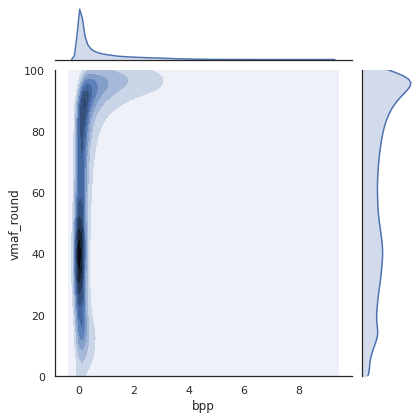

In [117]:
dk["bpp"] =(dk["size"] * 8) / (dk["height"] * dk["height"])
dk["bpp_log2"] =  np.log2(dk["bpp"])
d(dk)
print(dk["bpp"].max(),dk["bpp"].min(),)
ax = sns.jointplot(
    y="vmaf_round", 
    x="bpp", 
    kind="kde",
    data=dk,
    ylim=(0,100),
)
ax.savefig("all_img_kde_vmaf_vs_bpp.pdf", bbox_inches="tight", dpi=400, rasterized=True)

In [126]:
corr = []

for x in ["bpp_log2", "height_log2", "crf_log2", "bpp", "height", "crf"]:
    c = {"vmaf_round": x}
    for m in ["pearson", "kendall", "spearman"]:
        c[m] = dk[[x, "vmaf_round"]].corr(method=m)[x][-1]
    corr.append(c)

dc = pd.DataFrame(corr).sort_values(by="pearson")
d(dc)
print(dc.to_latex(index=False))

,vmaf_round,pearson,kendall,spearman
5,crf,-0.731062,-0.580390,-0.750957
2,crf_log2,-0.608559,-0.580390,-0.750957
3,bpp,0.288862,0.308557,0.447557
0,bpp_log2,0.404086,0.308557,0.447557
4,height,0.529982,0.386511,0.539676
1,height_log2,0.580820,0.386511,0.539676


\begin{tabular}{lrrr}
\toprule
  vmaf\_round &   pearson &   kendall &  spearman \\
\midrule
         crf & -0.731062 & -0.580390 & -0.750957 \\
    crf\_log2 & -0.608559 & -0.580390 & -0.750957 \\
         bpp &  0.288862 &  0.308557 &  0.447557 \\
    bpp\_log2 &  0.404086 &  0.308557 &  0.447557 \\
      height &  0.529982 &  0.386511 &  0.539676 \\
 height\_log2 &  0.580820 &  0.386511 &  0.539676 \\
\bottomrule
\end{tabular}

